In [ ]:
# Loading dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("/content/EPL_Data.xlsx")
print("Initial Data:\n", df.head())
print("\n Shape of data: ", df.shape)

Initial Data:
   Div        Date      Time    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  13/08/2021  20:00:00   Brentford         Arsenal     2     0   H     1   
1  E0  14/08/2021  12:30:00  Man United           Leeds     5     1   H     1   
2  E0  14/08/2021  15:00:00     Burnley        Brighton     1     2   A     1   
3  E0  14/08/2021  15:00:00     Chelsea  Crystal Palace     3     0   H     2   
4  E0  14/08/2021  15:00:00     Everton     Southampton     3     1   H     0   

   HTAG  ...  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A  
0     0  ...   8   2   5   0   0   0   0   4.00   3.40   1.95  
1     0  ...   9   5   4   1   2   0   0   1.53   4.50   5.75  
2     0  ...   7   7   6   2   1   0   0   3.10   3.10   2.45  
3     0  ...  11   5   2   0   0   0   0   1.25   5.75  13.00  
4     1  ...  15   6   8   2   0   0   0   1.90   3.50   4.00  

[5 rows x 26 columns]

 Shape of data:  (1579, 26)


In [ ]:
df.describe(include='all')

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1579,1579,1579,1579,1579,1579.000000,1579.000000,1579,1579.000000,1579.000000,...,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
unique,1,485,21,27,27,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E0,22/05/2022,15:00:00,Brentford,Arsenal,NaN,NaN,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1579,10,547,79,79,NaN,NaN,704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.609880,1.348322,NaN,0.728309,0.592147,...,10.934136,5.678911,4.724509,1.774541,2.024066,0.060165,0.058898,2.871406,4.294984,4.456460
std,NaN,NaN,NaN,NaN,NaN,1.349009,1.229244,NaN,0.860499,0.800563,...,3.606882,3.125614,2.880286,1.325325,1.363819,0.248295,0.238184,2.054474,1.358595,3.776627
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.140000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,...,8.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.620000,3.500000,2.200000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,...,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.250000,3.800000,3.200000
75%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,...,13.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000,3.250000,4.500000,5.250000


In [ ]:
# Checking missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
dtype: int64


In [ ]:
# Map match results to descriptive labels
df['Result'] = df['FTR'].map({'H': '1', 'A': '2', 'D': '0'})

# One-hot encode the 'Result' column
df_encoded = pd.get_dummies(df, columns=['Result'], prefix='Outcome')

# Show sample
print(df[['HomeTeam', 'AwayTeam', 'FTR']].head())
print(df_encoded[['HomeTeam', 'AwayTeam', 'Outcome_1', 'Outcome_2', 'Outcome_0']].head())

# Save encoded data
df_encoded.to_csv("matches_onehot.csv", index=False)


     HomeTeam        AwayTeam FTR
0   Brentford         Arsenal   H
1  Man United           Leeds   H
2     Burnley        Brighton   A
3     Chelsea  Crystal Palace   H
4     Everton     Southampton   H
     HomeTeam        AwayTeam  Outcome_1  Outcome_2  Outcome_0
0   Brentford         Arsenal       True      False      False
1  Man United           Leeds       True      False      False
2     Burnley        Brighton      False       True      False
3     Chelsea  Crystal Palace       True      False      False
4     Everton     Southampton       True      False      False


In [ ]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [ ]:
# Checking missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
Result      0
dtype: int64


In [ ]:
df["Referee"].value_counts()

,count
Referee,
A Taylor,120
M Oliver,111
S Hooper,97
C Pawson,92
R Jones,86
S Attwell,85
A Madley,84
P Tierney,82
C Kavanagh,81


In [ ]:
df["HomeTeam"].value_counts()

,count
HomeTeam,
Brentford,79
Man United,79
Chelsea,79
Tottenham,79
Liverpool,79
Newcastle,79
Arsenal,79
Brighton,79
Man City,79


In [ ]:
df[df["HomeTeam"] == "Sunderland"]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result
1523,E0,16/08/2025,15:00:00,Sunderland,West Ham,3,0,H,0,0,...,5,7,0,1,0,0,3.25,3.4,2.25,1
1542,E0,30/08/2025,15:00:00,Sunderland,Brentford,2,1,H,0,0,...,3,4,3,2,0,0,3.00,3.3,2.40,1
1568,E0,21/09/2025,14:00:00,Sunderland,Aston Villa,1,1,D,0,0,...,6,5,2,1,1,0,3.40,3.5,2.10,0


In [ ]:
date = df["Date"] < 2022-1-1

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
df.dtypes

,0
Div,object
Date,object
Time,object
HomeTeam,object
AwayTeam,object
FTHG,int64
FTAG,int64
FTR,object
HTHG,int64
HTAG,int64


In [ ]:
df["Result"]=df["Result"].astype(int)

In [ ]:
le = LabelEncoder()
le.fit(pd.concat([df["HomeTeam"], df["AwayTeam"]]))
df["HomeTeamCode"] = le.transform(df["HomeTeam"])
df["AwayTeamCode"] = le.transform(df["AwayTeam"])
df["RefereeCode"] = le.fit_transform(df["Referee"])

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

/tmp/ipython-input-936118274.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
df["time"] = df["Time"].astype(str)
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [ ]:
df.dtypes

,0
Div,object
Date,datetime64[ns]
Time,object
HomeTeam,object
AwayTeam,object
FTHG,int64
FTAG,int64
FTR,object
HTHG,int64
HTAG,int64


In [ ]:
df.head(25)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AR,B365H,B365D,B365A,Result,HomeTeamCode,AwayTeamCode,time,hour,RefereeCode
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,2,0,H,1,0,...,0,4.00,3.40,1.95,1,3,0,20:00:00,20,22
1,E0,2021-08-14,12:30:00,Man United,Leeds,5,1,H,1,0,...,0,1.53,4.50,5.75,1,16,11,12:30:00,12,26
2,E0,2021-08-14,15:00:00,Burnley,Brighton,1,2,A,1,0,...,0,3.10,3.10,2.45,2,5,4,15:00:00,15,7
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,3,0,H,2,0,...,0,1.25,5.75,13.00,1,6,7,15:00:00,15,14
4,E0,2021-08-14,15:00:00,Everton,Southampton,3,1,H,0,1,...,0,1.90,3.50,4.00,1,8,21,15:00:00,15,1
5,E0,2021-08-14,15:00:00,Leicester,Wolves,1,0,H,1,0,...,0,1.66,3.80,5.25,1,12,26,15:00:00,15,5
6,E0,2021-08-14,15:00:00,Watford,Aston Villa,3,2,H,2,0,...,0,3.10,3.20,2.37,1,24,1,15:00:00,15,20
7,E0,2021-08-14,17:30:00,Norwich,Liverpool,0,3,A,0,1,...,0,9.00,5.75,1.30,2,18,13,17:30:00,17,2
8,E0,2021-08-15,14:00:00,Newcastle,West Ham,2,4,A,2,1,...,0,3.20,3.50,2.20,2,17,25,14:00:00,14,19
9,E0,2021-08-15,16:30:00,Tottenham,Man City,1,0,H,0,0,...,0,5.50,4.20,1.60,1,23,15,16:30:00,16,3


In [ ]:
# Final processed data
print("Processed Data:\n")
print(df.head())

df.to_csv("/content/sample_data/processed.csv", index=False)
print("\nProcessed file saved")

df.shape


Processed file saved



 Descriptive Statistics:
               count                           mean                  min  \
Date            1579  2023-08-03 18:04:19.911336448  2021-01-11 00:00:00   
FTHG          1579.0                        1.60988                  0.0   
FTAG          1579.0                       1.348322                  0.0   
HTHG          1579.0                       0.728309                  0.0   
HTAG          1579.0                       0.592147                  0.0   
HS            1579.0                      14.174161                  1.0   
AS            1579.0                      11.808106                  1.0   
HST           1579.0                       4.936035                  0.0   
AST           1579.0                       4.148828                  0.0   
HF            1579.0                      10.561115                  1.0   
AF            1579.0                      10.934136                  1.0   
HC            1579.0                       5.678911           

/tmp/ipython-input-2943887945.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette='viridis')


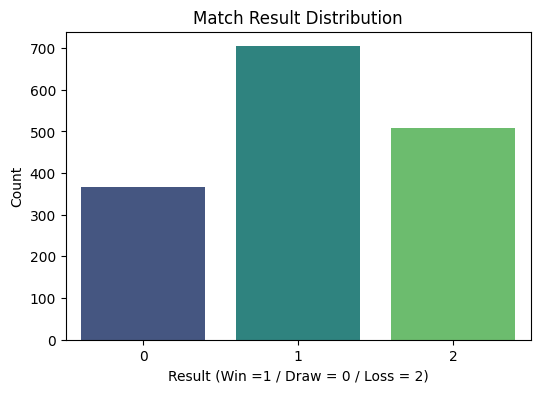

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#  Statistical Summary
print("\n Descriptive Statistics:")
print(df.describe().T)

#  Target Variable: Result
# --------------------------
if 'Result' in df.columns:
    print("\n Match Result Distribution:")
    print(df['Result'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(x='Result', data=df, palette='viridis')
    plt.title("Match Result Distribution")
    plt.xlabel("Result (Win =1 / Draw = 0 / Loss = 2)")
    plt.ylabel("Count")
    plt.show()


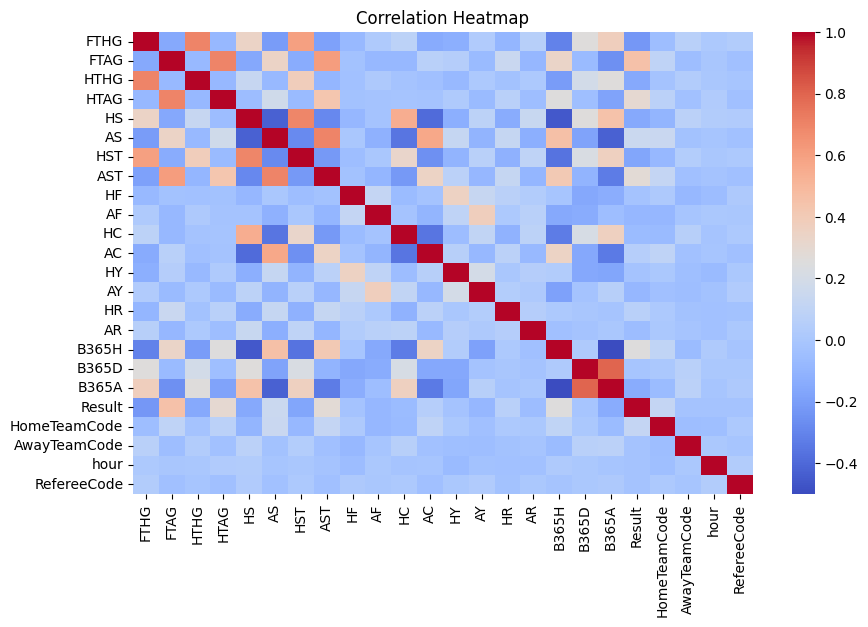


🔍 Top 10 Correlations with Result:
Result          1.000000
FTAG            0.450716
HTAG            0.301294
AST             0.281181
B365H           0.255251
AS              0.145180
HomeTeamCode    0.116459
HR              0.066978
AC              0.056081
B365D          -0.008105
Name: Result, dtype: float64


In [ ]:
# Correlation Analysis

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Top correlations with target if numeric-encoded
if df['Result'].dtype != 'object':
    correlations = numeric_df.corr()['Result'].sort_values(ascending=False)
    print("\n Top 10 Correlations with Result:")
    print(correlations.head(10))
else:
    print("\n(Result is categorical; skipping correlation with numeric encoding.)")



 Average Goals:
Home Goals (avg): 1.61
Away Goals (avg): 1.35


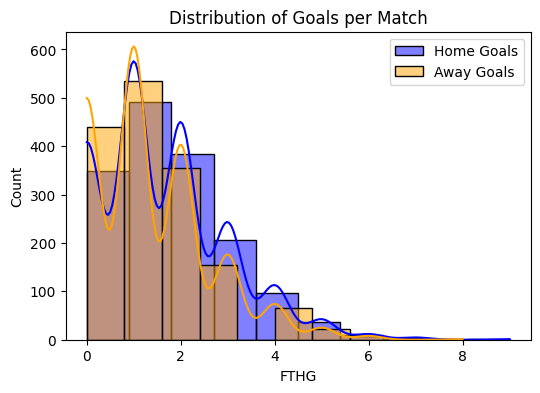

In [ ]:
# Numerical Insights

if 'FTHG' in df.columns and 'FTAG' in df.columns:
    print("\n Average Goals:")
    print("Home Goals (avg):", round(df['FTHG'].mean(), 2))
    print("Away Goals (avg):", round(df['FTAG'].mean(), 2))

    plt.figure(figsize=(6,4))
    sns.histplot(df['FTHG'], bins=10, kde=True, color='blue', label='Home Goals')
    sns.histplot(df['FTAG'], bins=10, kde=True, color='orange', label='Away Goals')
    plt.legend()
    plt.title("Distribution of Goals per Match")
    plt.show()

/tmp/ipython-input-2602120755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y='FTHG', data=df, palette='coolwarm')


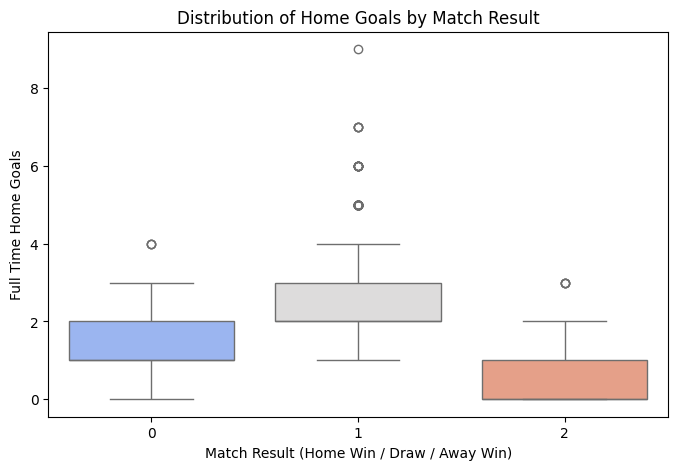

/tmp/ipython-input-2602120755.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y='FTAG', data=df, palette='viridis')


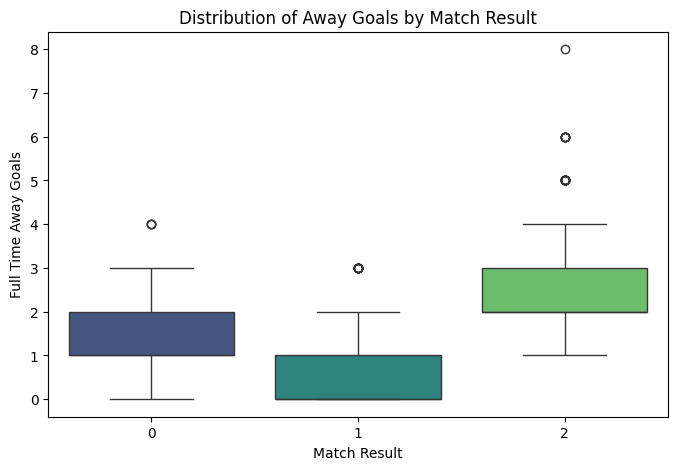

In [ ]:
# Box Plot: Goals vs Result
if 'FTHG' in df.columns and 'Result' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Result', y='FTHG', data=df, palette='coolwarm')
    plt.title("Distribution of Home Goals by Match Result")
    plt.xlabel("Match Result (Home Win / Draw / Away Win)")
    plt.ylabel("Full Time Home Goals")
    plt.show()

if 'FTAG' in df.columns and 'Result' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Result', y='FTAG', data=df, palette='viridis')
    plt.title("Distribution of Away Goals by Match Result")
    plt.xlabel("Match Result")
    plt.ylabel("Full Time Away Goals")
    plt.show()

/tmp/ipython-input-3122513338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=feature, data=df, palette='Spectral')


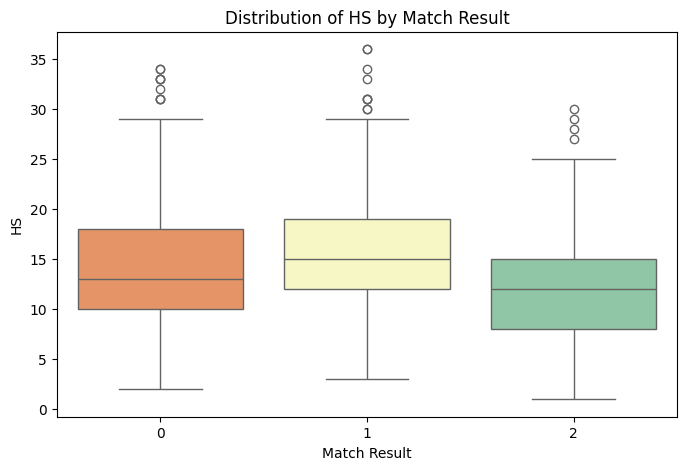

/tmp/ipython-input-3122513338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=feature, data=df, palette='Spectral')


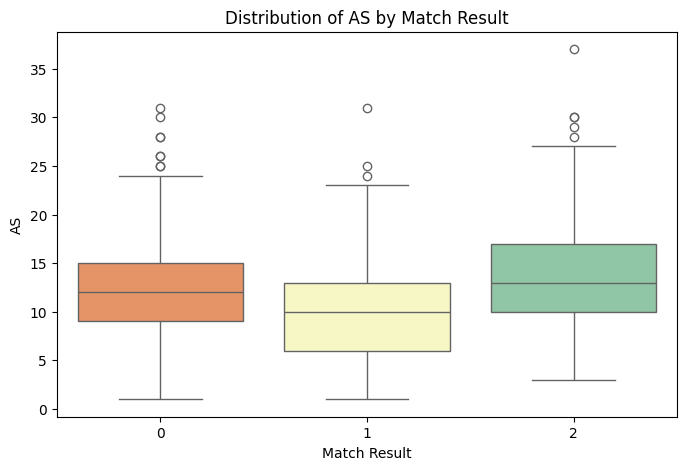

/tmp/ipython-input-3122513338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=feature, data=df, palette='Spectral')


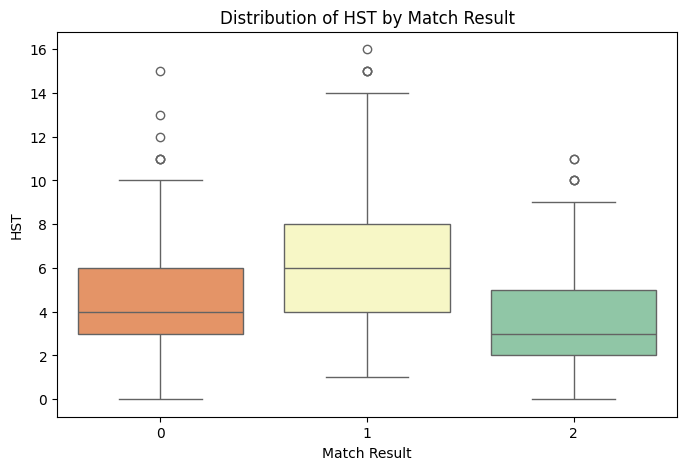

/tmp/ipython-input-3122513338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=feature, data=df, palette='Spectral')


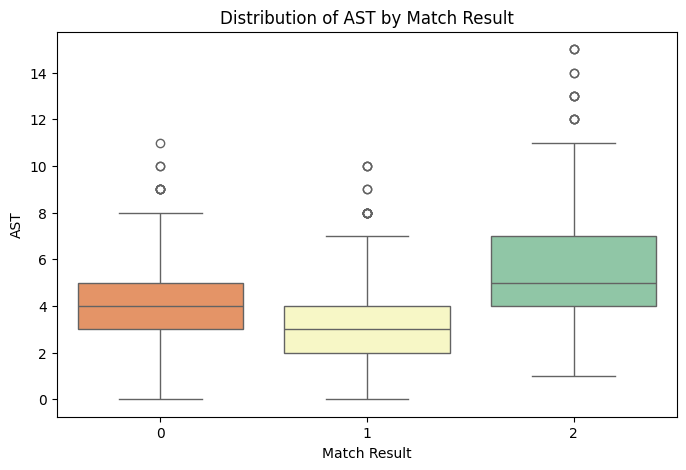

In [ ]:
# Box Plot: Shots & Possession vs Result
for feature in ['HS', 'AS', 'HST', 'AST', 'HPossession', 'APossession']:
    if feature in df.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(x='Result', y=feature, data=df, palette='Spectral')
        plt.title(f"Distribution of {feature} by Match Result")
        plt.xlabel("Match Result")
        plt.ylabel(feature)
        plt.show()

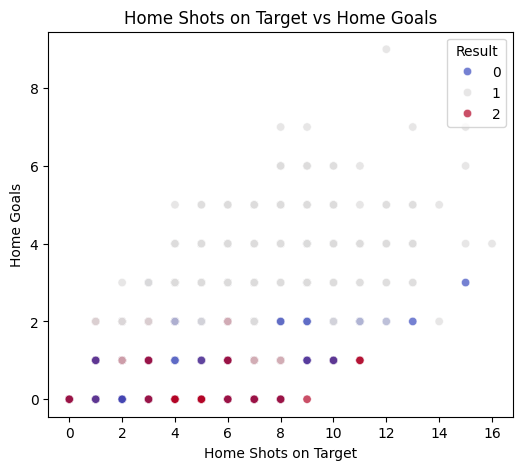

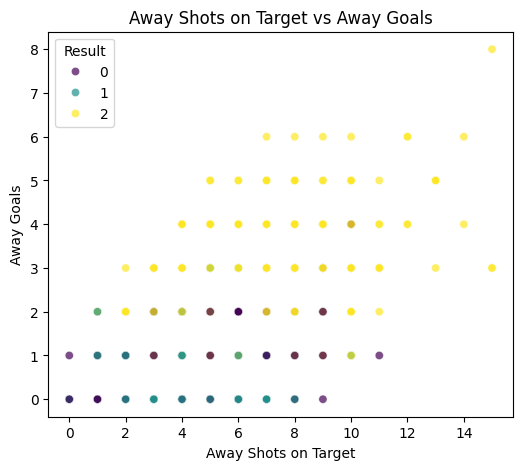

In [ ]:
# Scatter Plot: Relationship Exploration

# Example 1: Shots on Target vs Goals
if 'HST' in df.columns and 'FTHG' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x='HST', y='FTHG', hue='Result', data=df, palette='coolwarm', alpha=0.7)
    plt.title("Home Shots on Target vs Home Goals")
    plt.xlabel("Home Shots on Target")
    plt.ylabel("Home Goals")
    plt.show()

if 'AST' in df.columns and 'FTAG' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x='AST', y='FTAG', hue='Result', data=df, palette='viridis', alpha=0.7)
    plt.title("Away Shots on Target vs Away Goals")
    plt.xlabel("Away Shots on Target")
    plt.ylabel("Away Goals")
    plt.show()

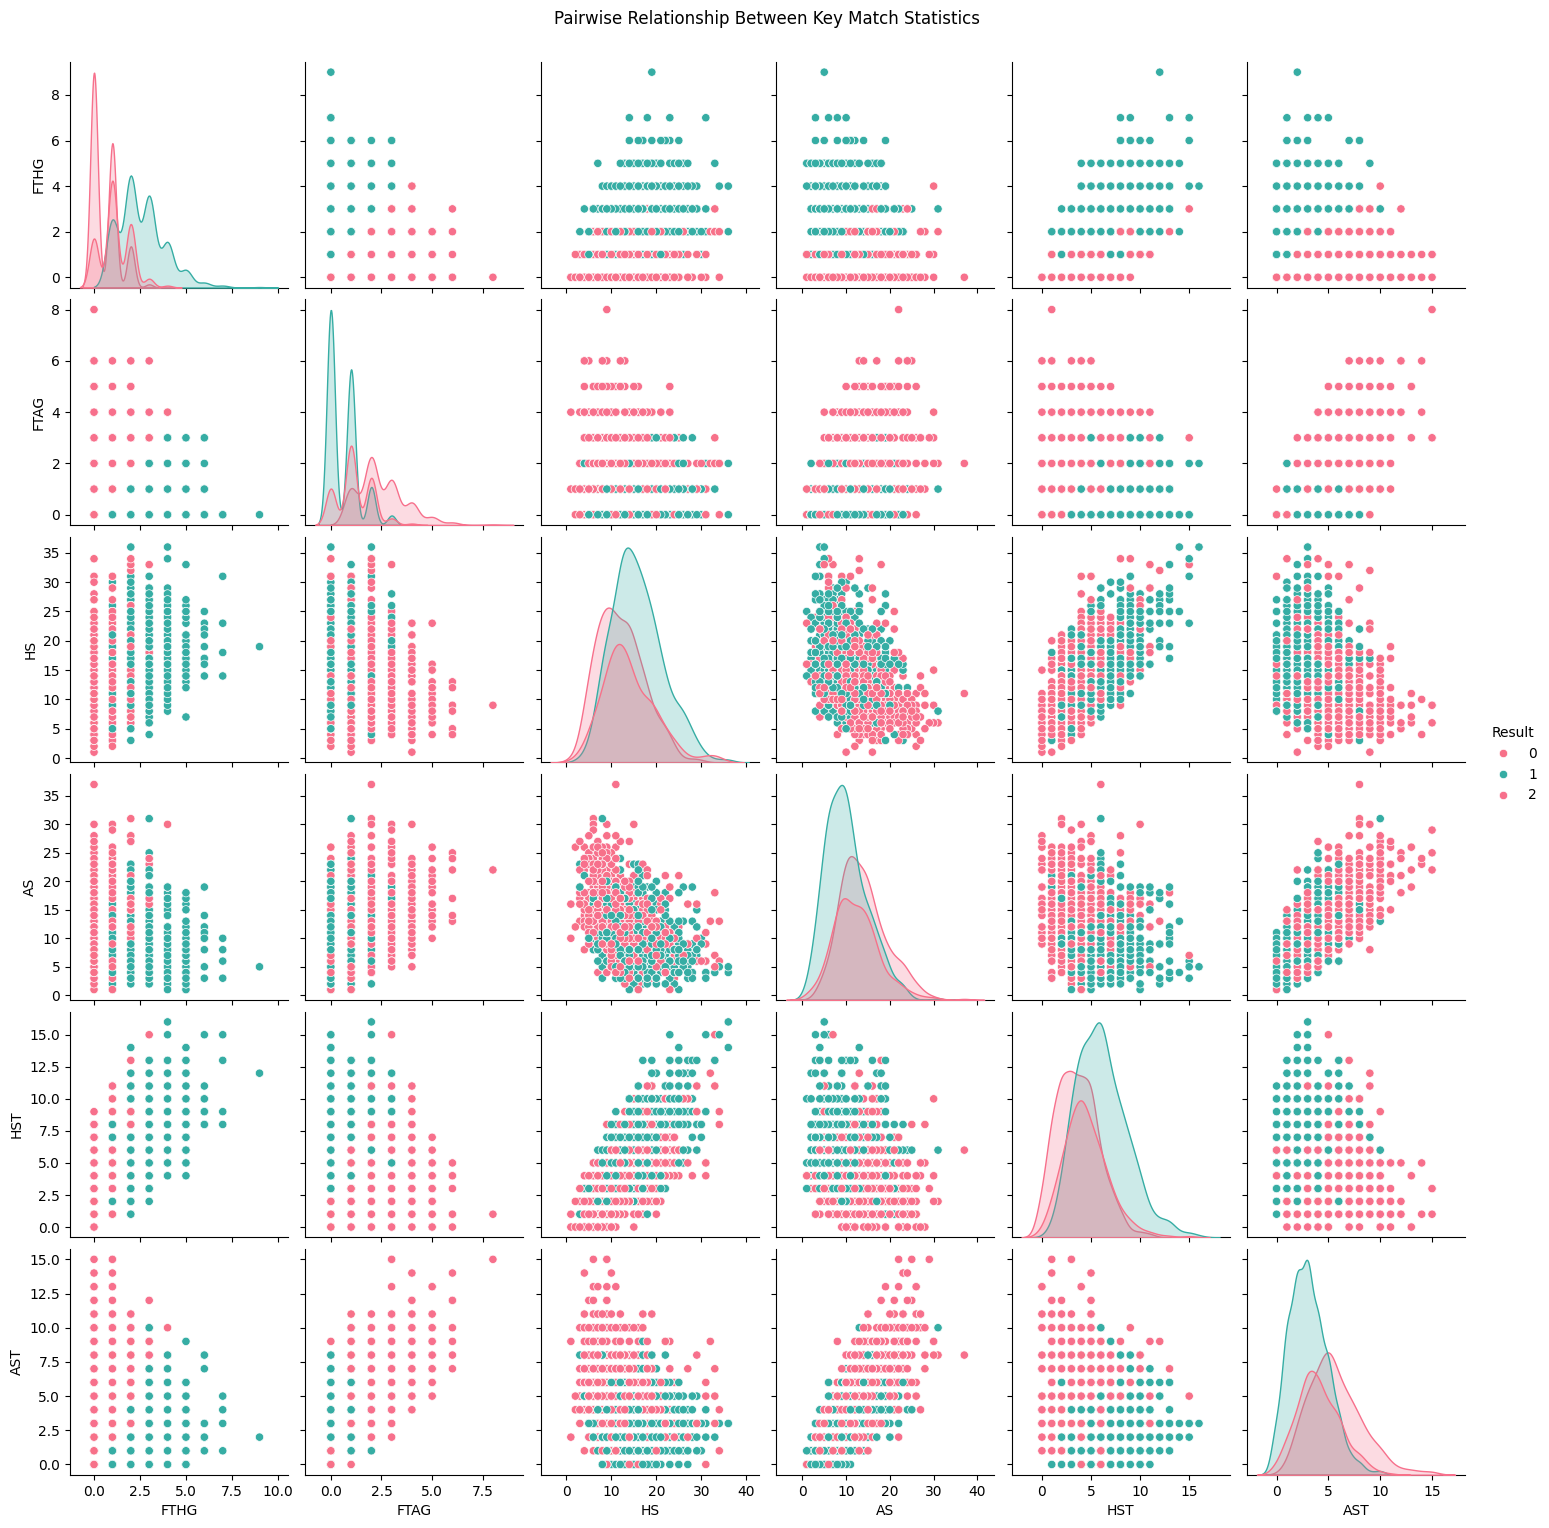

In [ ]:
# Optional: Goals Correlation Pairplot
num_cols = [col for col in df.columns if col in ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST']]
if len(num_cols) > 2:
    sns.pairplot(df[num_cols + ['Result']], hue='Result', palette='husl', diag_kind='kde')
    plt.suptitle("Pairwise Relationship Between Key Match Statistics", y=1.02)
    plt.show()

In [ ]:
# Insights Summary

print("""
 ".." Key Insights Summary:
1️) Dataset has {} matches and {} columns.
2️) Most frequent result: {}.
3️) Average home goals ≈ {}, away goals ≈ {}.
4️) {} unique teams, indicating full Premier League coverage.
5️) Home advantage likely visible if home win % > away win %.
6️) Ready for feature engineering and predictive modeling.
""".format(
    df.shape[0],
    df.shape[1],
    df['Result'].mode()[0] if 'Result' in df.columns else "N/A",
    round(df['FTHG'].mean(), 2) if 'FTHG' in df.columns else "N/A",
    round(df['FTAG'].mean(), 2) if 'FTAG' in df.columns else "N/A",
    df['HomeTeam'].nunique() if 'HomeTeam' in df.columns else "N/A"
))


 ".." Key Insights Summary:
1️) Dataset has 1579 matches and 32 columns.
2️) Most frequent result: 1.
3️) Average home goals ≈ 1.61, away goals ≈ 1.35.
4️) 27 unique teams, indicating full Premier League coverage.
5️) Home advantage likely visible if home win % > away win %.
6️) Ready for feature engineering and predictive modeling.



In [ ]:
# import numpy as np

# # Get the data with numerical form
# df = q.cells("P2:X1581", first_row_header=True)

# # Get all unique teams
# all_teams = sorted(set(df.iloc[:, 0].unique()) | set(df.iloc[:, 1].unique()))

# # Function to calculate team statistics
# def calculate_team_stats(team_name):
#     # Home matches
#     home_matches = df[df.iloc[:, 0] == team_name].copy()
#     home_wins = len(home_matches[home_matches.iloc[:, 2] == 'H'])
#     home_draws = len(home_matches[home_matches.iloc[:, 2] == 'D'])
#     home_losses = len(home_matches[home_matches.iloc[:, 2] == 'A'])
#     home_goals = home_wins * 3 + home_draws  # Points system

#     # Away matches
#     away_matches = df[df.iloc[:, 1] == team_name].copy()
#     away_wins = len(away_matches[away_matches.iloc[:, 2] == 'A'])
#     away_draws = len(away_matches[away_matches.iloc[:, 2] == 'D'])
#     away_losses = len(away_matches[away_matches.iloc[:, 2] == 'H'])
#     away_goals = away_wins * 3 + away_draws  # Points system

#     # Total statistics
#     total_matches = len(home_matches) + len(away_matches)
#     total_wins = home_wins + away_wins
#     total_draws = home_draws + away_draws
#     total_losses = home_losses + away_losses
#     total_points = home_goals + away_goals

#     # Calculate ratings
#     win_rate = total_wins / total_matches if total_matches > 0 else 0
#     points_per_game = total_points / total_matches if total_matches > 0 else 0

#     # Form rating (average of last 5 matches)
#     recent_form = []
#     for _, row in df.iterrows():
#         if row.iloc[0] == team_name:  # Home team
#             recent_form.append(row['HomeTeam_Form_Avg'])
#         elif row.iloc[1] == team_name:  # Away team
#             recent_form.append(row['AwayTeam_Form_Avg'])

#     avg_form = np.mean(recent_form) if recent_form else 0

#     # Overall rating (weighted combination)
#     # 40% win rate, 40% points per game, 20% recent form
#     overall_rating = (win_rate * 0.4 +
#                      (points_per_game / 3) * 0.4 +  # Normalize to 0-1 scale
#                      ((avg_form + 1) / 2) * 0.2)    # Normalize form from -1,1 to 0,1

#     return {
#         'Team': team_name,
#         'Total_Matches': total_matches,
#         'Wins': total_wins,
#         'Draws': total_draws,
#         'Losses': total_losses,
#         'Win_Rate': win_rate,
#         'Points_Per_Game': points_per_game,
#         'Recent_Form_Avg': avg_form,
#         'Overall_Rating': overall_rating,
#         'Home_Record': f"{home_wins}W-{home_draws}D-{home_losses}L",
#         'Away_Record': f"{away_wins}W-{away_draws}D-{away_losses}L"
#     }

# # Calculate ratings for all teams
# team_ratings = []
# for team in all_teams:
#     team_stats = calculate_team_stats(team)
#     team_ratings.append(team_stats)

# # Create DataFrame and sort by overall rating
# team_ratings_df = pd.DataFrame(team_ratings)
# team_ratings_df = team_ratings_df.sort_values('Overall_Rating', ascending=False)

# # Add ranking
# team_ratings_df['Rank'] = range(1, len(team_ratings_df) + 1)

# print("Team Overall Ratings (Based on Win Rate, Points Per Game, and Recent Form)")
# print("=" * 80)
# print(f"{'Rank':<4} {'Team':<15} {'Rating':<8} {'Win%':<6} {'PPG':<5} {'Form':<6} {'Record':<15}")
# print("-" * 80)

# for _, row in team_ratings_df.iterrows():
#     print(f"{row['Rank']:<4} {row['Team']:<15} {row['Overall_Rating']:.3f}    "
#           f"{row['Win_Rate']:.3f} {row['Points_Per_Game']:.2f} {row['Recent_Form_Avg']:.3f}  "
#           f"{row['Home_Record']}/{row['Away_Record']}")

# team_ratings_df